In [1]:
# Traced curves of each component from Noordermeer's paper

In [2]:
import sys
sys.path.append('../../python/')

import dataPython as dp
import numpy as np
import scipy.interpolate as inter
import matplotlib.pyplot as plt
import time

In [3]:
starttime = time.time()

data_total = dp.getXYdata('../data/final/nord-120kpc-total.txt')
data_bh = dp.getXYdata('../data/final/nord-120kpc-blackhole.txt')
data_bulge = dp.getXYdata('../data/final/nord-120kpc-bulge.txt')
data_disk = dp.getXYdata('../data/final/nord-120kpc-disk.txt')
data_halo = dp.getXYdata('../data/final/nord-120kpc-halo.txt')
data_gas = dp.getXYdata('../data/final/nord-120kpc-gas.txt')
data_greyb_bottom = dp.getXYdata('../data/final/nord-120kpc-bottomband.txt')
data_greyb_top = dp.getXYdata('../data/final/nord-120kpc-topband.txt')

In [4]:
# Measured data points
#data = dp.getXYdata_wXYerr('../data/NGC5533-rot-data_fmt.txt')
data = dp.getXYdata_wXYerr('../data/final/nord-120kpc-datapoints.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

In [5]:
xmax = 120
rval = np.linspace(0.01,xmax,100)
#r = np.arange(0.1,xmax,0.1)

In [6]:
# Uncertainty band
# convert to numpy arrays
r_bottomband = np.asarray(data_greyb_bottom['xx'])
v_bottomband = np.asarray(data_greyb_bottom['yy'])
r_topband = np.asarray(data_greyb_top['xx'])
v_topband = np.asarray(data_greyb_top['yy'])

# smoothing - new, `spline` would not run on my computer
tb, cb, kb = inter.splrep(r_bottomband,v_bottomband)
tt, ct, kt = inter.splrep(r_topband,   v_topband)

greyb_bottom = inter.BSpline(tb, cb, kb)
greyb_top    = inter.BSpline(tt, ct, kt)

arr = rval[rval < 100]

#greyb_bottom = inter.spline(r_bottomband,v_bottomband,rval,kind='smoothest')
#greyb_top = inter.spline(r_topband,v_topband,rval,kind='smoothest')

In [7]:
# Total curve
# convert to numpy arrays
r_total = np.asarray(data_total['xx'])
v_total = np.asarray(data_total['yy'])

# smoothing - new, `spline` would not run on my computer
t, c, k = inter.splrep(r_total,v_total)
f_v_total = inter.BSpline(t,c,k)

#f_v_total = inter.spline(r_total,v_total,rval,kind='smoothest')

In [8]:
# Black hole
# convert to numpy arrays
r_bh = np.asarray(data_bh['xx'])
v_bh = np.asarray(data_bh['yy'])

# smoothing - new, `spline` would not run on my computer
t, c, k = inter.splrep(r_bh,v_bh)
f_v_bh = inter.BSpline(t,c,k)

#f_v_bh = inter.spline(r_bh,v_bh,rval,kind='smoothest')

In [9]:
# Bulge
# convert to numpy arrays
r_bulge = np.asarray(data_bulge['xx'])
v_bulge = np.asarray(data_bulge['yy'])

# smoothing - new, `spline` would not run on my computer
t, c, k = inter.splrep(r_bulge,v_bulge)
f_v_bulge = inter.BSpline(t,c,k)

#f_v_bulge = inter.spline(r_bulge,v_bulge,rval,kind='smoothest')

In [10]:
# Disk
# convert to numpy arrays
r_disk = np.asarray(data_disk['xx'])
v_disk = np.asarray(data_disk['yy'])

#delete first element of disk arrays bc it's acting weird otherwise
r_disk = r_disk[1:]
v_disk = v_disk[1:]
# smoothing - new, `spline` would not run on my computer
t, c, k = inter.splrep(r_disk,v_disk)
f_v_disk = inter.BSpline(t,c,k)

#f_v_disk = inter.spline(r_disk,v_disk,rval,kind='smoothest')

In [11]:
# Halo
# convert to numpy arrays
r_halo = np.asarray(data_halo['xx'])
v_halo = np.asarray(data_halo['yy'])

# smoothing - new, `spline` would not run on my computer
t, c, k = inter.splrep(r_halo,v_halo)
f_v_halo = inter.BSpline(t,c,k)

#f_v_halo = inter.spline(r_halo,v_halo,rval,kind='smoothest')

In [12]:
# Gas
# convert to numpy arrays
r_gas = np.asarray(data_gas['xx'])
v_gas = np.asarray(data_gas['yy'])

# smoothing - new, `spline` would not run on my computer
t, c, k = inter.splrep(r_gas,v_gas)
f_v_gas = inter.BSpline(t,c,k)

In [13]:
# Added total - just to see how the components add up
f_addedtotal = lambda r: np.sqrt(f_v_halo(r)**2 + f_v_d(r)**2 + f_v_b(r)**2 + f_v_bh(r)**2 + f_v_g(r)**2)
f_addedtotal_v = np.vectorize(f_addedtotal)

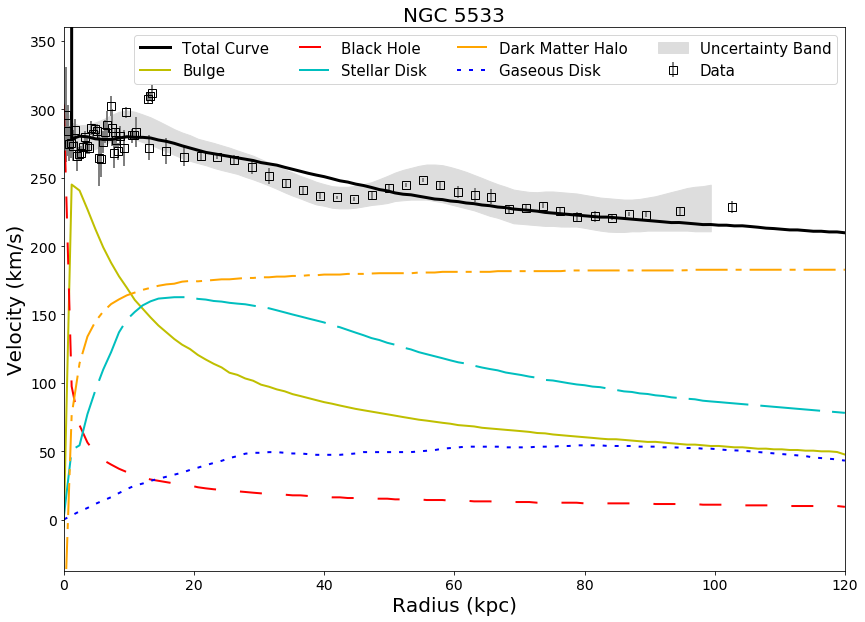

In [14]:
fig = plt.figure(figsize=(14.0,10.0))                
ax = plt.axes()

    
plt.errorbar(r_dat,v_dat,yerr=[v_err0,v_err1], marker='s', markerfacecolor='none', markersize=8,
             ecolor='gray',color='k', linestyle='none', label='Data', linewidth=2)

plt.fill_between(arr,greyb_bottom(arr),greyb_top(arr),color='#dddddd', label='Uncertainty Band')

plt.plot(rval, f_v_total(rval), color='k', linewidth=3,label='Total Curve') 
plt.plot(rval, f_v_bulge(rval), color='y', linewidth=2, label='Bulge') 
plt.plot(rval, f_v_bh(rval), color='r', linewidth=2,dashes=[11, 12],label='Black Hole')
plt.plot(rval, f_v_disk(rval), color='c', linewidth=2,dashes=[30, 6],label='Stellar Disk')
plt.plot(rval, f_v_halo(rval), color='orange', linewidth=2,dashes=[16, 4,3,4],label='Dark Matter Halo')
plt.plot(rval, f_v_gas(rval), color='blue', linewidth=2,dashes=[2, 4],label='Gaseous Disk') 
#plt.plot(rval, f_addedtotal_v(rval), color='k', linewidth=3, linestyle='solid', label='added total')

ax.set_ylim(-37.5,360)
ax.set_xlim(0,xmax)
ax.set_title('NGC 5533', fontsize=20)             
ax.set_xlabel('Radius (kpc)', fontsize=20)
ax.set_ylabel('Velocity (km/s)', fontsize=20)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(loc='best',prop={'size': 15},ncol=4)
#plt.tight_layout()
#plt.savefig('Noordermeer_plot.eps')
#plt.show()
#plt.savefig('../Reproducibility_Paper_Figures/full_comparison.png')

In [15]:
fig = plt.figure(figsize=(14.0,10.0))                
ax = plt.axes()

    
plt.errorbar(r_dat,v_dat,yerr=[v_err0,v_err1], marker='s', markerfacecolor='none', markersize=8,
             ecolor='gray',color='k', linestyle='none', label='Data', linewidth=2)

plt.fill_between(arr,greyb_bottom(arr),greyb_top(arr),color='#dddddd', label='Uncertainty Band')

plt.plot(rval, f_v_total(rval), color='k', linewidth=3,label='Total Curve') 
plt.plot(rval, f_v_bulge(rval), color='y', linewidth=2, label='Bulge') 
plt.plot(rval, f_v_bh(rval), color='r', linewidth=2,dashes=[11, 12],label='Black Hole')
plt.plot(rval, f_v_disk(rval), color='c', linewidth=2,dashes=[30, 6],label='Stellar Disk')
plt.plot(rval, f_v_halo(rval), color='orange', linewidth=2,dashes=[16, 4,3,4],label='Dark Matter Halo')
plt.plot(rval, f_v_gas(rval), color='blue', linewidth=2,dashes=[2, 4],label='Gaseous Disk') 
#plt.plot(rval, f_addedtotal_v(rval), color='k', linewidth=3, linestyle='solid', label='added total')

ax.set_ylim(-37.5,360)
ax.set_xlim(0,xmax)
#ax.set_title('NGC 5533', fontsize=20)             
#ax.set_xlabel('Radius (kpc)', fontsize=20)
#ax.set_ylabel('Velocity (km/s)', fontsize=20)
#ax.xaxis.set_tick_params(labelsize=14)
#ax.yaxis.set_tick_params(labelsize=14);
plt.axis('off')

plt.legend(loc='best',prop={'size': 15},ncol=4)
#plt.tight_layout()
#plt.savefig('Noordermeer_plot.eps')
#plt.show()
plt.savefig('../Reproducibility_Paper_Figures/full_comparison.png',bbox_inches = 'tight',
    pad_inches = 0)
plt.close(fig)

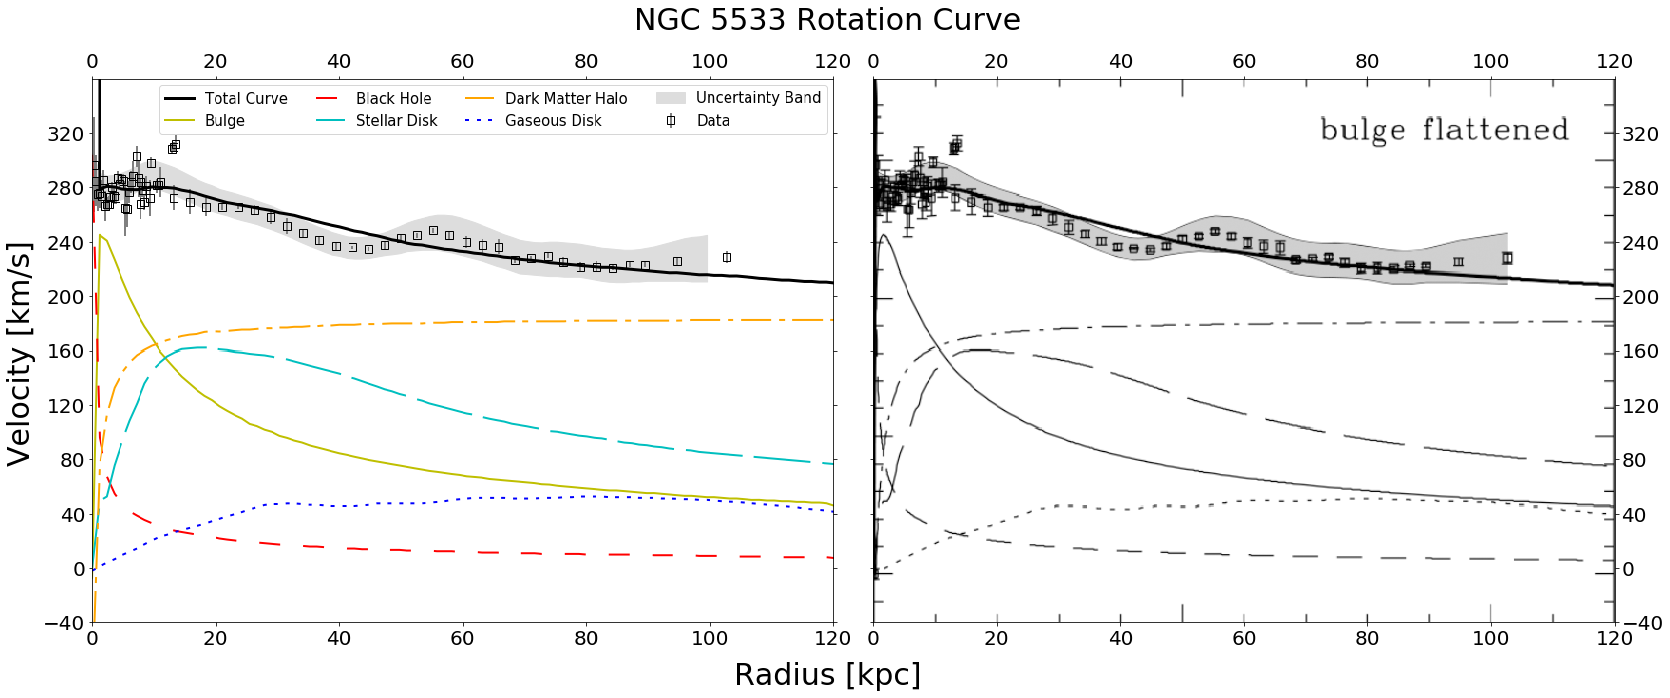

In [16]:
import matplotlib.image as mpimg

img1 = mpimg.imread('../Reproducibility_Paper_Figures/act_noord.png')
img2 = mpimg.imread('../Reproducibility_Paper_Figures/full_comparison.png')
fig, (ax1, ax2) = plt.subplots(figsize=(28.0,10.0), ncols=2, sharey=True)

ax1.imshow(img2, interpolation='none', extent=[0, 120, -40, 360], aspect=.22)
#ax1.axis('off')
ax1.tick_params(labeltop=True, labelbottom=True, labelright=False, labelleft=True,
                top=True, bottom=True, right=True, left=True,labelsize=20)
ax1.yaxis.set_major_locator(plt.MultipleLocator(20))

ax2.imshow(img1, interpolation='none', extent=[0, 120, -40, 360], aspect=.22)
#ax2.axis('off')
ax2.tick_params(labeltop=True, labelbottom=True, labelright=True, labelleft=False,
                top=True, bottom=True, right=True, left=True,labelsize=20)


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=None)
plt.yticks(np.arange(-40, 360, 40))
fig.text(0.5, 0.05, 'Radius [kpc]', ha='center', va='center',fontsize=30)
fig.text(0.1, 0.5, 'Velocity [km/s]', ha='center', va='center', rotation='vertical',fontsize=30)
fig.suptitle('NGC 5533 Rotation Curve', fontsize=30)

plt.savefig('../Reproducibility_Paper_Figures/side_comparison.png',bbox_inches = 'tight',
    pad_inches = 0)
plt.show()

In [17]:
endtime = time.time()
print('Total Time:')
runtime = endtime - starttime

if runtime<=3600:
    minutes, runtime= divmod(runtime, 60)
    print(str(minutes)+'min', str(runtime)+'s')

elif runtime>3600 and runtime<=86400:
    minutes = runtime/60
    hours, minutes= divmod(minutes, 60)
    print(str(hours)+'hrs', str(round(minutes))+'min')

elif runtime>86400:
    hours = runtime/3600
    days, hours= divmod(hours, 24)
    print(str(days)+'days', str(round(hours))+'hrs')

Total Time:
0.0min 2.6154515743255615s
